# Enron Dataset Project

In this file, will be all the quizz and exercices for the last Udacity project.

### Purpose:
The project is an analysis of Enron case. Enron is an American Energy company that collapse to bankruptcy in 2001 (cf; Wikipedia). Thanks to the federal investigation, a large amount of confidential documents are now publics, which allow us to perform a deep machine learning investigation.
The target of this machine learning investigation is to predict, based on email and financial material, who are the instigator, at list person of interest, in this financial bankruptcy.




### Ressources
a text file is provided aside this notebook. 
The main ressources are : 
-	Python 2.7
-	Jupyter notebook
-	Wikipedia
-	Stackoverflow.com
-	GeekforGeeks.com
-	Udacity



## Data Exploration

### Project Objectives:

<I>(Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? [relevant rubric items: “data exploration”, “outlier investigation”]).
</I>


The pedagogic or learning objectives of this project are multiple. Indeed, part of the overall process, it’s a full use case of data analysis work. A huge dataset that need to be explored which imply understanding the data, check for data quality.

The finality of this project in term of concrete result is to use machine learning to predict who could have been a Person Of Interest in this affair, meaning who could be part of this massive fraud. To do so, the process will be based on the emails and financial information analysis.


In order to analyse this dataset, first have a look at different attributes and characteristics.
-	How many people in the dataset
-	Record definition
-	List of people
-	What are the information (category) 


## Investigate into the dataset

In the comming line, I investigate into the data set in order to understand which data I can work with.

In [12]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "rb"))

print 'Number of People in Dataset: ', len(enron_data)



Number of People in Dataset:  146


In [13]:
### Another method using loop

l_counter = 0
l_counter_cat = 0
l_tot = 0
for keys in enron_data: 
        if l_counter == 0:
            print 'Here is a one record sample: ', (keys, '=>', enron_data[keys])
        l_counter = l_counter + 1

print 'Number of People in Dataset: ', l_counter 

Here is a one record sample:  ('METTS MARK', '=>', {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38})
Number of People in Dataset:  146


<B> Who are these person ?

In [14]:
import pprint

pretty = pprint.PrettyPrinter()
names = sorted(enron_data.keys())  #sort names of Enron employees in dataset by first letter of last name

print 'Sorted list of Enron employees by last name'
pretty.pprint(names) 

Sorted list of Enron employees by last name
['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE'

In [15]:
print 'Dictionnary Example : Value : Feature'
pretty.pprint(enron_data['HORTON STANLEY C']) 

Dictionnary Example : Value : Feature
{'bonus': 'NaN',
 'deferral_payments': 3131860,
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'stanley.horton@enron.com',
 'exercised_stock_options': 5210569,
 'expenses': 'NaN',
 'from_messages': 1073,
 'from_poi_to_this_person': 44,
 'from_this_person_to_poi': 15,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 2046079,
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 1074,
 'to_messages': 2350,
 'total_payments': 3131860,
 'total_stock_value': 7256648}


At this point we can notice that some category have a "NaN" value. this will need to be cleand later.


Let see how we can call category.

In [16]:
# Total Value of stock James Prentice
print enron_data['PRENTICE JAMES']['total_stock_value']
print enron_data['COLWELL WESLEY']['from_this_person_to_poi']
print enron_data['SKILLING JEFFREY K']['exercised_stock_options']

1095040
11
19250000


<B> How many category have we per person ? </B>

In [17]:
print "for each there is xx category"
for cat in enron_data['HORTON STANLEY C']:
    l_counter_cat = l_counter_cat + 1
            
print ("Nombre de category")    
print (l_counter_cat, '. : ' , cat)
l_counter_cat = 0


for each there is xx category
Nombre de category
(21, '. : ', 'from_poi_to_this_person')


In [18]:
import csv
### Write the data into a csv file in order to ease the analysis
fieldnames = ['name'] + enron_data['HORTON STANLEY C'].keys()

with open('enron.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    ### Exclude line Total
    for name in enron_data.keys():
        if name != 'TOTAL':
            n = {'name':name}
            n.update(enron_data[name])
            writer.writerow(n)      

In [19]:
import pandas as pd
### Use a panda dataframe to ease data reading

###====================================================
l_counter = 0
poi_name = pd.DataFrame(columns=['Keys'])
for keys in enron_data: 
        ###print(keys, '=>', enron_data[keys])
        if enron_data[keys]["poi"] == 1:
            ###print keys
            poi_name = poi_name.append({'Keys': keys.split(' ', 1)[0].capitalize()}, ignore_index=True)
            l_counter = l_counter + 1
print "In the dataset there is xx person of Interest :", l_counter
print

poi_name.sort_values(by=['Keys'], inplace = True)
print poi_name

###====================================================

In the dataset there is xx person of Interest : 18

        Keys
8     Belden
7      Bowen
10    Calger
16    Causey
1    Colwell
5   Delainey
9     Fastow
17    Glisan
0     Hannon
14     Hirko
15    Koenig
3     Kopper
6        Lay
11      Rice
2     Rieker
4     Shelby
12  Skilling
13    Yeager


In [20]:
### Use a Panda data frame to read enron csv we generate above
enron = pd.read_csv('enron.csv')

### Understand mail behaviour
#added feature, ratio of e-mails to and from poi
enron['ratio_to_poi'] = enron['from_this_person_to_poi'].fillna(0.0)/enron['from_messages'].fillna(0.0)
enron['ratio_from_poi'] = enron['from_poi_to_this_person'].fillna(0.0)/enron['to_messages'].fillna(0.0)

enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 24 columns):
name                         145 non-null object
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null bool
director_fees                16 non-null float64
deferred_inc

In [21]:
#number of POI in dataset
print 'There are 18 POI in our Dataset as you can see by our "True" count'
enron['poi'].value_counts()

There are 18 POI in our Dataset as you can see by our "True" count


False    127
True      18
Name: poi, dtype: int64

In [22]:
#set a baseline by extracting non-POIs and printing stats

non_poi = enron[enron.poi.isin([False])]

non_poi_money = non_poi[['salary','bonus','exercised_stock_options','total_stock_value',\
                         'total_payments']].describe()
non_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments
count,7.700000e+01,6.500000e+01,8.900000e+01,1.070000e+02,1.060000e+02
mean,2.621515e+05,9.868249e+05,1.947752e+06,2.374085e+06,1.725091e+06
std,1.392317e+05,1.173880e+06,2.547068e+06,3.535017e+06,2.618288e+06
min,4.770000e+02,7.000000e+04,3.285000e+03,-4.409300e+04,1.480000e+02
25%,2.061210e+05,4.000000e+05,4.365150e+05,4.246845e+05,3.304798e+05
50%,2.516540e+05,7.000000e+05,1.030329e+06,1.030329e+06,1.056092e+06
75%,2.885890e+05,1.000000e+06,2.165172e+06,2.307584e+06,2.006025e+06
max,1.060932e+06,8.000000e+06,1.536417e+07,2.381793e+07,1.725253e+07


In [23]:
non_poi_email_behavior = non_poi[['shared_receipt_with_poi','to_messages',\
                                  'from_messages', 'ratio_to_poi','ratio_from_poi']].describe()
non_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,ratio_to_poi,ratio_from_poi
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1058.527778,2007.111111,668.763889,0.152669,0.036107
std,1132.503757,2693.165955,1978.997801,0.206057,0.041929
min,2.000000,57.000000,12.000000,0.000000,0.000000
25%,191.500000,513.750000,20.500000,0.000000,0.007760
50%,594.000000,944.000000,41.000000,0.053776,0.022741
75%,1635.500000,2590.750000,216.500000,0.225000,0.050705
max,4527.000000,15149.000000,14368.000000,1.000000,0.217341


In [24]:
#POI stats

poi_info = enron[enron.poi.isin([True])]

poi_money = poi_info[['salary','bonus','exercised_stock_options','total_stock_value',\
                      'total_payments']].describe()
poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments
count,1.700000e+01,1.600000e+01,1.200000e+01,1.800000e+01,1.800000e+01
mean,3.834449e+05,2.075000e+06,1.046379e+07,9.165671e+06,7.913590e+06
std,2.783597e+05,2.047437e+06,1.238259e+07,1.384117e+07,2.396549e+07
min,1.584030e+05,2.000000e+05,3.847280e+05,1.260270e+05,9.109300e+04
25%,2.401890e+05,7.750000e+05,1.456581e+06,1.016450e+06,1.142396e+06
50%,2.786010e+05,1.275000e+06,3.914557e+06,2.206836e+06,1.754028e+06
75%,4.151890e+05,2.062500e+06,1.938604e+07,1.051133e+07,2.665345e+06
max,1.111258e+06,7.000000e+06,3.434838e+07,4.911008e+07,1.035598e+08


In [25]:
poi_email_behavior = poi_info[['shared_receipt_with_poi','to_messages',\
                                  'from_messages', 'ratio_to_poi', 'ratio_from_poi']].describe()
poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,ratio_to_poi,ratio_from_poi
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1783.000000,2417.142857,300.357143,0.345470,0.047507
std,1264.996625,1961.858101,805.844574,0.156894,0.032085
min,91.000000,225.000000,16.000000,0.173611,0.021339
25%,1059.250000,1115.750000,33.000000,0.228580,0.026900
50%,1589.000000,1875.000000,44.500000,0.276389,0.030639
75%,2165.250000,2969.250000,101.500000,0.427083,0.059118
max,5521.000000,7991.000000,3069.000000,0.656250,0.136519


## Explore Data

In the section below we will compare financial value from POI and Non Poi perspective. this will certainly lead us to some useless as well as usefull information. But also help us to have a clearer understanding of the dataset.
May be a pattern will be draw.
On order to do so, we will simply compare the value using plots.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [27]:
average_salary = enron.groupby('poi').mean()['salary']
average_salary

poi
False    262151.506494
True     383444.882353
Name: salary, dtype: float64

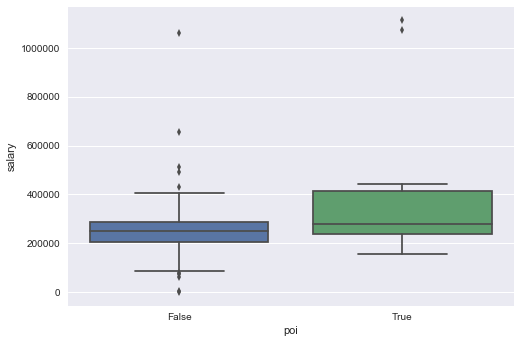

In [28]:
sns.boxplot(x='poi',y='salary',data=enron)

In [29]:
enron[(enron['salary']>600000)][['name','salary', 'bonus','poi']]

,name,salary,bonus,poi
65,LAY KENNETH L,1072321.0,7000000.0,True
95,SKILLING JEFFREY K,1111258.0,5600000.0,True
100,PICKERING MARK R,655037.0,300000.0,False
128,FREVERT MARK A,1060932.0,2000000.0,False


In [30]:
average_bonus = enron.groupby('poi').mean()['bonus']
average_bonus

poi
False    9.868249e+05
True     2.075000e+06
Name: bonus, dtype: float64

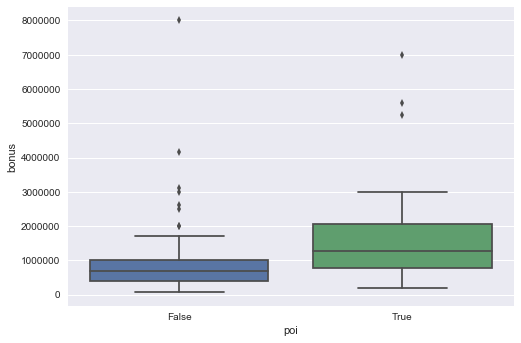

In [31]:
sns.boxplot(x='poi',y='bonus',data=enron)

A non POI has really a massive bonus. 8M, is even higher than POI. Let's see who are the top 5 (over 4M).

In [32]:
enron[(enron['bonus']>4000000)][['name','salary','bonus','exercised_stock_options','restricted_stock','total_stock_value','poi']]

,name,salary,bonus,exercised_stock_options,restricted_stock,total_stock_value,poi
43,LAVORATO JOHN J,339288.0,8000000.0,4158995.0,1008149.0,5167144.0,False
65,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,49110078.0,True
82,BELDEN TIMOTHY N,213999.0,5249999.0,953136.0,157569.0,1110705.0,True
95,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,6843672.0,26093672.0,True
108,ALLEN PHILLIP K,201955.0,4175000.0,1729541.0,126027.0,1729541.0,False


In [33]:
average_total_payments = enron.groupby('poi').mean()['total_payments']
average_total_payments

poi
False    1.725091e+06
True     7.913590e+06
Name: total_payments, dtype: float64

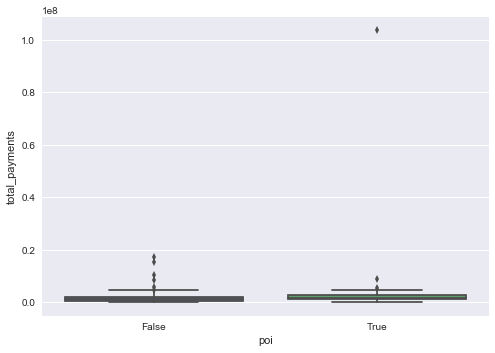

In [34]:
sns.boxplot(x='poi',y='total_payments',data=enron)

Let's see who has this out of range total payment and check where this value come from.


In [35]:
enron[(enron['total_payments']>40000000)][['name','salary', 'bonus', 'total_stock_value','total_payments','poi']]

,name,salary,bonus,total_stock_value,total_payments,poi
65,LAY KENNETH L,1072321.0,7000000.0,49110078.0,103559793.0,True


In [36]:
enron[(enron['name']== 'LAY KENNETH L')]

,name,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,...,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,ratio_to_poi,ratio_from_poi
65,LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,...,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0,0.444444,0.028785


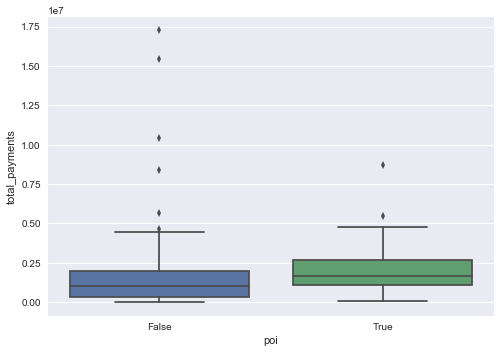

In [37]:
### Exclude Kenneth from this comparison
enron_k_excluded = enron[(enron['total_payments']<40000000)]

sns.boxplot(x='poi',y='total_payments',data=enron_k_excluded)

Even without Kenneth, we still have some huge amount in the non poi group.

In [38]:
average_optionsvalue = enron.groupby('poi').mean()['exercised_stock_options']
average_optionsvalue


poi
False    1.947752e+06
True     1.046379e+07
Name: exercised_stock_options, dtype: float64

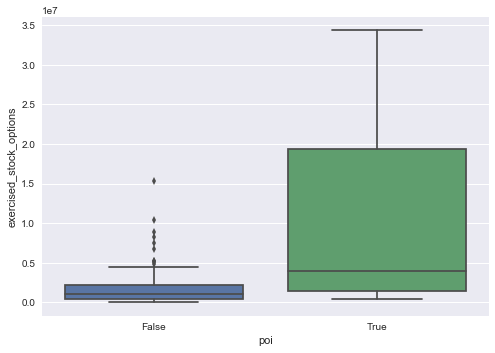

In [39]:
sns.boxplot(x='poi',y='exercised_stock_options',data=enron)

In [57]:
Non surprisingly, the POI have a important amount of exercized stock options.

SyntaxError: invalid syntax (<ipython-input-57-77bac47481f7>, line 1)

In [40]:
average_stockvalue = enron.groupby('poi').mean()['total_stock_value']
average_stockvalue

poi
False    2.374085e+06
True     9.165671e+06
Name: total_stock_value, dtype: float64

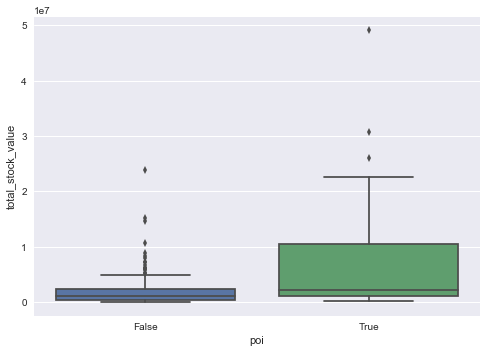

In [41]:
sns.boxplot(x='poi',y='total_stock_value',data=enron)

In [42]:
enron[(enron['total_stock_value']>20000000)][['name','salary', 'bonus', 'total_stock_value','total_payments','poi']]

,name,salary,bonus,total_stock_value,total_payments,poi
65,LAY KENNETH L,1072321.0,7000000.0,49110078.0,103559793.0,True
88,RICE KENNETH D,420636.0,1750000.0,22542539.0,505050.0,True
95,SKILLING JEFFREY K,1111258.0,5600000.0,26093672.0,8682716.0,True
125,HIRKO JOSEPH,NaN,NaN,30766064.0,91093.0,True
129,PAI LOU L,261879.0,1000000.0,23817930.0,3123383.0,False


In [43]:
average_shared_receipt = enron.groupby('poi').mean()['shared_receipt_with_poi']
average_shared_receipt

poi
False    1058.527778
True     1783.000000
Name: shared_receipt_with_poi, dtype: float64

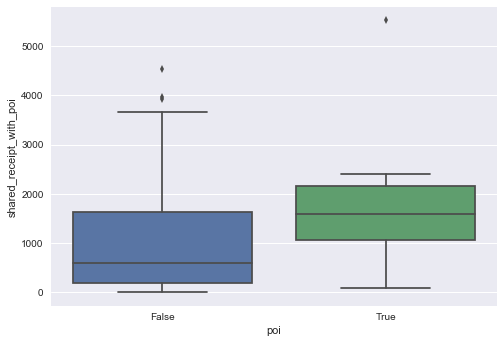

In [44]:
sns.boxplot(x='poi',y='shared_receipt_with_poi',data= enron)

In the representation above, we can notice that we have one outlier in the poi group. 

In [45]:
average_to = enron.groupby('poi').mean()['to_messages']
average_to

poi
False    2007.111111
True     2417.142857
Name: to_messages, dtype: float64

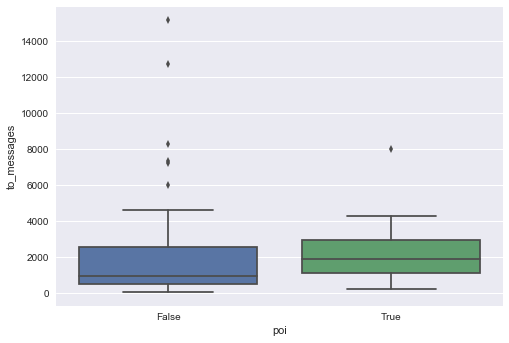

In [46]:
sns.boxplot(x='poi',y='to_messages',data= enron)

In the visualization above, we can identify that some are really having a huge mail activity. May be interesting to identify these person, but definitely, email behaviour will be interesting to use as a category.

In [47]:
average_from = enron.groupby('poi').mean()['from_messages']
average_from

poi
False    668.763889
True     300.357143
Name: from_messages, dtype: float64

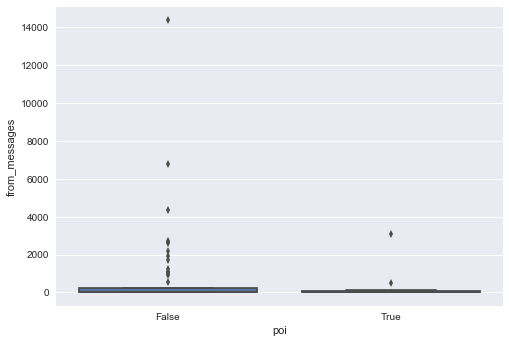

In [48]:
sns.boxplot(x='poi',y='from_messages',data= enron)

In [49]:
enron[(enron['from_messages']>2000)][['name','salary', 'bonus', 'from_messages','poi']]

,name,salary,bonus,from_messages,poi
25,SHANKMAN JEFFREY A,304110.0,2000000.0,2681.0,False
32,BECK SALLY W,231330.0,700000.0,4343.0,False
43,LAVORATO JOHN J,339288.0,8000000.0,2585.0,False
58,MCCONNELL MICHAEL S,365038.0,1100000.0,2742.0,False
60,DELAINEY DAVID W,365163.0,3000000.0,3069.0,True
89,KAMINSKI WINCENTY J,275101.0,400000.0,14368.0,False
103,KEAN STEVEN J,404338.0,1000000.0,6759.0,False
108,ALLEN PHILLIP K,201955.0,4175000.0,2195.0,False


In [50]:
### Ratio to poi
average_ratio_to = enron.groupby('poi').mean()['ratio_to_poi']
average_ratio_to

poi
False    0.152669
True     0.345470
Name: ratio_to_poi, dtype: float64

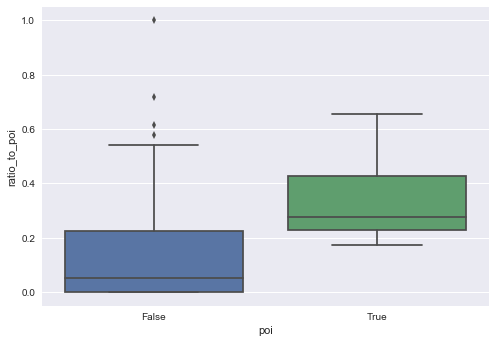

In [51]:
sns.boxplot(x='poi',y='ratio_to_poi',data= enron)

In [52]:
enron[(enron['ratio_to_poi']>0.6)][['name','salary', 'bonus', 'from_messages','poi']]

,name,salary,bonus,from_messages,poi
4,HANNON KEVIN P,243293.0,1500000.0,32.0,True
10,HUMPHREY GENE E,130724.0,NaN,17.0,False
97,SHERRICK JEFFREY B,NaN,NaN,25.0,False
122,GARLAND C KEVIN,231946.0,850000.0,44.0,False


In [53]:
### Ratio from poi
average_ratio_from = enron.groupby('poi').mean()['ratio_from_poi']
average_ratio_from

poi
False    0.036107
True     0.047507
Name: ratio_from_poi, dtype: float64

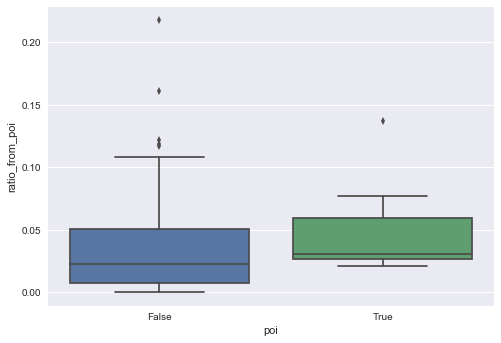

In [54]:
sns.boxplot(x='poi',y='ratio_from_poi',data= enron)

In [59]:
enron[(enron['ratio_from_poi']>0.10)][['name','salary', 'bonus', 'from_messages','poi','ratio_from_poi']]

,name,salary,bonus,from_messages,poi,ratio_from_poi
11,UMANOFF ADAM S,288589.0,788750.0,18.0,False,0.108108
16,COLWELL WESLEY,288542.0,1200000.0,40.0,True,0.136519
55,DEFFNER JOSEPH M,206121.0,600000.0,74.0,False,0.161064
80,REDMOND BRIAN L,96840.0,NaN,221.0,False,0.122083
83,DURAN WILLIAM D,210692.0,750000.0,12.0,False,0.117257
126,DIETRICH JANET R,250100.0,600000.0,63.0,False,0.118585
143,DONAHUE JR JEFFREY M,278601.0,800000.0,22.0,False,0.217341


C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


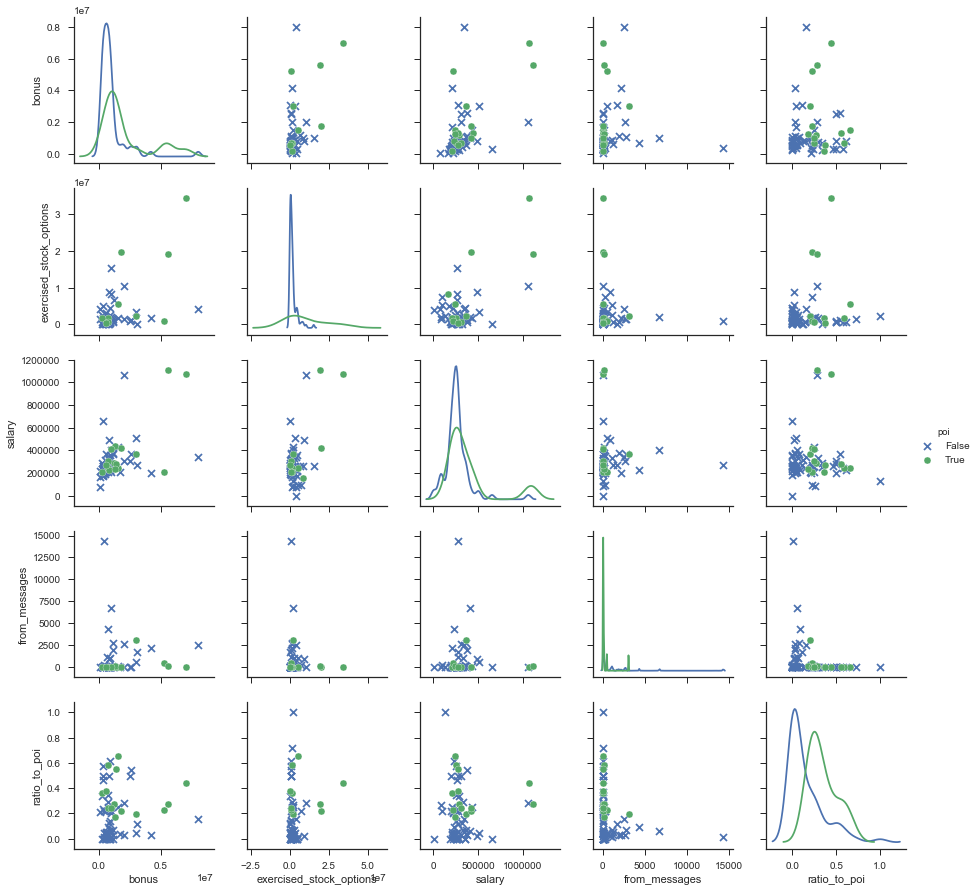

In [55]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(enron, vars=['bonus','exercised_stock_options', 'salary','from_messages','ratio_to_poi'],
                 dropna=True, diag_kind='kde', hue='poi', markers=['x','o'])

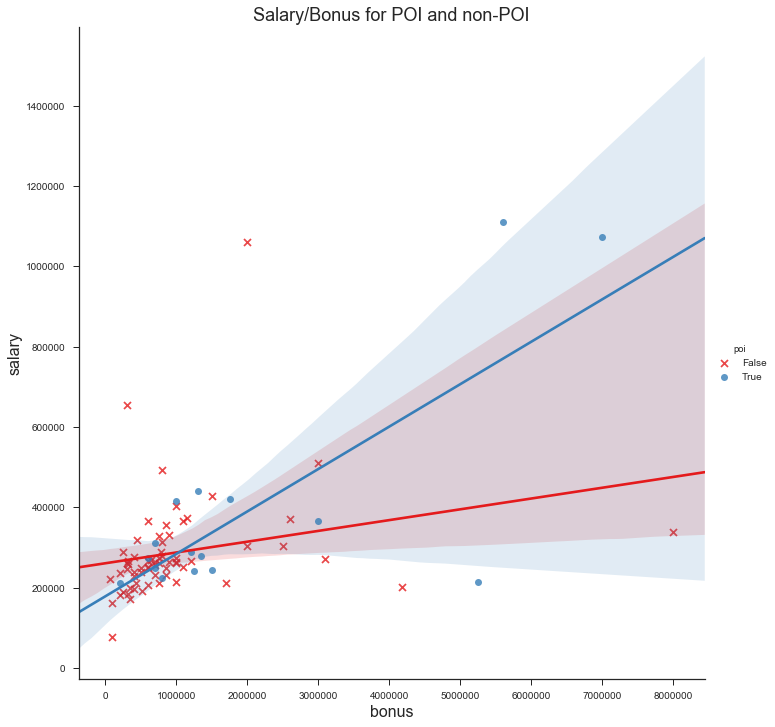

In [56]:
sns.lmplot(x='bonus', y= 'salary', hue='poi', data=enron, palette='Set1',size=10,markers=['x','o'])
plt.title('Salary/Bonus for POI and non-POI', fontsize=18)
plt.xlabel('bonus', fontsize=16)
plt.ylabel('salary', fontsize=16)

### First confirmations
Based on this exploration, it seems to me important to analyse either financial categories as well as mail behaviour categories.
The following categories will be used :
'name','salary','bonus','exercised_stock_options', 'ratio_from_poi', 'ratio_to_poi'.


### Next step : 
let's confirm it via poi_id.py where I will investigate the feature to use, then apply algorythm and validate this study.

# Performance and Validation

## Speaking about features scaling
Scaling feature is necessary when within a feature the values have a huge amplitude, a different scale in that sens. Thus in order to be able to compare more correctely the feature values, in a kind of standardization, it can be necessary to rescale the feature.
Then a mathematics way to proceed is to define a new value based on the min and max values.
new_val = (val - min_val)/(max_val - min_val).

Also another important point is that there is a need of having feature with a trade of between the variable. So only few model can be affected by scaling such as SVM and K-means.

As I will not use this model I don't see any reason to use scaling in the model and feature I use, nevetheless I'll implement a scaler in the Feature selection (see my_clf_run.py / def Kbest).

## Features Selection

feature selection is a step in the full process that you use to reduce your dataset dimensionnal in order to either improve estimator accuracy or improve their performance.
Initiali, inoorder to use kind of intuition, selected features is based on the analysis (first step done) as they were demonstrating strong difference between POI and non-POI.

I improve the selection using sklearn.
To do so, I choose to use an univariate feature selection and implement SelectKBest. SelectPercentil could also be a solution.
Then I implement SelectKbest and try to find the 5 best features out of the dataset including the added features.

This will be the feature for our last classifier.

## what it means to perform parameter tuning and why it is important

The aim of tuning parameter is to get the best of a model.
It could be done in a kind of manual manner, which is then an iterative process by simply varying the differents parameter we have in the model (size, gamma, ...).
Also Crossvalidation can be use to do it in a more automatic way.
In Sklearn, the GridSearchCV is the one that can work trough different combinaison of paramter. So doing the tunning automaticaly and then determine which tune gives the best performance.

As an exemple, when manualy tunning the size of the test set for my Naive_bayse model I obtained the following results:
The result of the tunning is: 

Which lead me to use a 0.2 size to fit the expected 0.3 Precision.
As my precision and my recall are not so good for this size, this meant the model will certainely flag wrongly, nevertheless the accuracy is quite high so it should not be that bad.

As a reminder Recall and Precision help understanding the performance of the model used.
Precision is the ratio demonstrating the ability of the classifier not to label as positive a sample that is negative.
Recall is the ratio demonstrating the ability of the classifier to find the all positive samples. 

I put in place a second Tuning using GridSearchCV with the model KNeighborsClassifier. This bring me the following best parameters:

I will then use these parameters in my final classifier.

## Validation , Evaluation

As the dataset is assymetric, there is lot more non-poi than poi, we will use a shufflesplit using the class StratifiedShuffleSplit from sklearn. The reason for that is that we want to measure the reliability and the accuracy of our model this is called the validation.
Therefor we need to train it and then test it with different dataset. Training our algorythm with the full dataset will lead us to overfitting situation and prevent to really be able to rely on it. this is the why the validation is important as it imply a good quality of our tests.
We also want to train and test with dataset that are not too assymetric in order to avoid any missleading testing. This is why I have used the StratifiedShuffleSplit class to split the dataset in order to have a training dataset that is respecting the repartion between poi & non-poi, so then the algorythm will be better train. 

This will then distribute with a better repartion of the data between train and test set. We will not use it with the naive bayse model as the effect will simply to level precision and recall.

But we will use it for the two other models : DecisionTree and KNeighborsClassifier.


Looking at the perofmance of the models, we clearly keep the KNeighborsClassifier as with a 93% accuracy this is much more better than the Decisiontree. Adding to the fact that the precision and recall are clearly higher as well.

Even if the table above display better accuracy and precision for the full list of feature or list without added feature our final list will be the one named Feature_1 that correspond to the list we identified above. And we keep the classifier KNeighborsClassifier.

# Final word

Surprisingly, using the 5 best features did not bring the best result, but strong one anyway.  Nevertheless the algorythm is providing good results with 87% of accuracy and 50% precision and 20% Recall.
So may be we will not flag a Poi but as well not to flag POI a Non_poi. And this is clearly what we expect in our case to avoid investigation on an innoncent.
 